# Loops

You'll very often want to repeat the same process/code block multiple times, and for this **looping** is very helpful. This is called **iteration** and is the repitition of some process, where each repitition is a single iteration. When you know how many times you want to repeat the process, you use a **for loop** & if you don't know how many times you want to repeat, you use a **while loop**. 

## While loops to read in files 

A common application of a **while loop** is when we want to read in a text file line by line. You initiate the while loop, `open` the file & naming it (typically `f`) in your variable space. The while loop will read in the file line by line, by repeating the same `.readlines()` action on each line. Each line can then be recursively added to a list you create. 

The reason this is done with a while loop is because you don't need to know how many lines are in the file, it will repeat the process until you run out of lines in the file, then break the loop.

Let's import the files `taxi_driver_actors.txt` and `taxi_driver_roles.txt` which contain a subset of movie credit data obtained from Netflix, found [here](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?resource=download), for the 1976 movie 'Taxi Driver' starring Robert De Niro. 

In [ ]:
# read in a text file line by line 
with open('taxi_driver_actors.txt') as f:    # open the text file into a new variable named `f`
    actors_init = f.readlines()                   # use `readlines()` to save the file into a variable named `actors`

with open('taxi_driver_roles.txt') as f:
    roles_init = f.readlines()

In [ ]:
print(actors_init)

In [ ]:
print(roles_init)

## Using a for loop to make a change to every item in the list 

You may have noticed that after each name/role in the lists above, there is a `\n`. This is called a  'newline' & it indicates the end of a line in the text file. 

We want to remove this because it really isn't part of the string, it's just an artifact of reading in the text file. We can use `.replace()` on each string to replace `\n` in our string with '' (nothing), thereby removing it. Another option is `.strip()` which removes spaces at the beginning and end of a string, which works in this case python recognizes `\n` as whitespace. Both methods are included in the cell below for demonstration of syntax, but we will only use one & comment out the other for now. 

We will use a **for loop** to demonstrate applying the change to each element in our list, which we call `a`. We will also nest this in a function so we can use it later. 

In [ ]:
def strip_newlines_actors(init_list):
    actors = []
    for a in init_list:
        #new_string = a.strip()
        new_string = a.replace('\n', '')
        actors.append(new_string)
    return actors


actors = strip_newlines_actors(actors_init)
actors

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Alter the for loop above to strip the newline from the `roles_init` list. Save the altered strings in a new list called `roles`. No need to turn this into a function. 

In [ ]:
### BEGIN SOLUTION 

roles = []
for r in roles_init:
    new_string = r.strip()
    roles.append(new_string)

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

## Using `enumerate` to add counters to your loops 

Python's built in `enumerate` function allows us to sequentially number items in a collection as we loop through them. It creates a "counter" in your loop so we can index each value. 

The `enumerate` function returns the **iteration count** and the **value** of each iteration when looping through a collection! Syntax is as follows:

        for index, value in enumerate(iterator):
            (do something)  

You'll notice that there are **two** things returned for every pass of the loop. Order matters here! You can replace `index` and `value` in the code above with any variable names you want, but the first will always be the **count** and the second will always be the **value**. 


Let's make a for loop that uses `enumerate` to pass each element in our iterable list, `roles`. We will use a conditional to have the loop print the index & value when we reach a certain desired value, `Doughboy`. 

In [ ]:
for i, r in enumerate(roles): 
    if r == 'Doughboy':
        print(i, r)

So using enumerate, we found that the character named "Doughboy" is number 19 in the roles list. We know that the roles & actors list follow the same ordering, meaning the indecies between the two are consistent. So we can alter the loop above to find the actor that plays Doughboy & print out a statement. 

In [ ]:
for i, r in enumerate(roles): 
    if r == 'Doughboy':
        doughboy_actor = actors[i]
        print(doughboy_actor + ' plays Doughboy in Taxi Driver')

And we could even turn this into a function to to take the input of any role in Taxi Driver, and give us our statement! 

In [ ]:
def get_actor(this_role):
    for i, r in enumerate(roles): 
        if r == this_role:
            this_actor = actors[i]
            print(this_actor + ' plays ' + this_role + ' in Taxi Driver')
        
get_actor('Doughboy')
get_actor('Iris\' Time Keeper')
get_actor('Betsy')

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Create a for loop using enumerate to find the index of actress Annie Gagen in our `actors` list. 

In [ ]:
### BEGIN SOLUTION 

for i, a in enumerate(actors): 
    if a == 'Annie Gagen':
        print (i, a)
        
### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

## List comprehension 

**List comprehensions** are a good way to condense your code in python, as they essentially allow us to write for loops in shorthand. List comprehensions allow us to quickly access each element in an iterable (list, tuple, ...) & act on them. 

The basic construction looks like this: 

        `new_list = [expression for element in iterable]`
        
Basically it is saying to go through each element in the iterable and to execute the expression. 

Let's create a list comprehension to do something to each element in our `actors` list. Say we want to print the name of each actor in all capital letters. 

In [ ]:
actors_capital = [actor.upper() for actor in actors]
actors_capital

Compare this one line to the amount of code that would be needed to write out the for loop in the tranditional way: 

        actors_capital = []
        for actor in actors:
            actor_caps = actor.upper()
            actors_capital.append(actor_caps)
            
In general, accomplishing tasks like this is a lot more streamlined using a list comprehension as compared to a for loop! 

List comprehensions also make it very easy to add one or two **conditions** to your iteration. These are optional, but can allow you to skip over or isolate certain elements. Common uses of this are **if in** and **if is not**. 

Let's take a look at the **if in** case, where the task is executed on the element *only* if the element meets a certain condition.

The following will pass through each `actor` in `actors`, and perform `actor.lower()` on the element **only if** the string contains 'Scorsese'. This will return a list that contains only elements that contain that string. 

In [ ]:
scorsese_lower = [actor.upper() for actor in actors if 'Scorsese' in actor]
scorsese_lower 


## Zipping lists 

One more handy thing we can do is use `zip` to combine two lists into one. Maybe rather than enumerate, we want to combine our actors and roles each into a single list. Note that the output of `zip()` is **not** the list itself, it is a `zip` object. We use `list()` to convert the output of `zip()` into our combined list. Each element in our new list is a **tuple**, which allows us to store multiple items in a single variable - so each element will contain our actor-role pairing.

In [ ]:
zipped = zip(actors, roles)
zipped_list = list(zipped)
zipped_list

Using this method, we can recreate our function to print out our role-actor pairs without having to worry about indexing. 

In [ ]:
def get_actor_from_zip(this_role):
    for z in zipped_list: 
        if this_role in z:
            print(z[0] + ' plays ' + z[1] + ' in Taxi Driver')
            
get_actor_from_zip('Charlie T')         

## Nesting loops 

Sometimes we will want to **nest** loops, which means putting one loop inside another. For each element in the outer loop, it will then act on each element in the inner loop. 

This can be a little confusing so the diagram below, from [here](https://www.faceprep.in/python/nested-loops-in-python/), should help. 

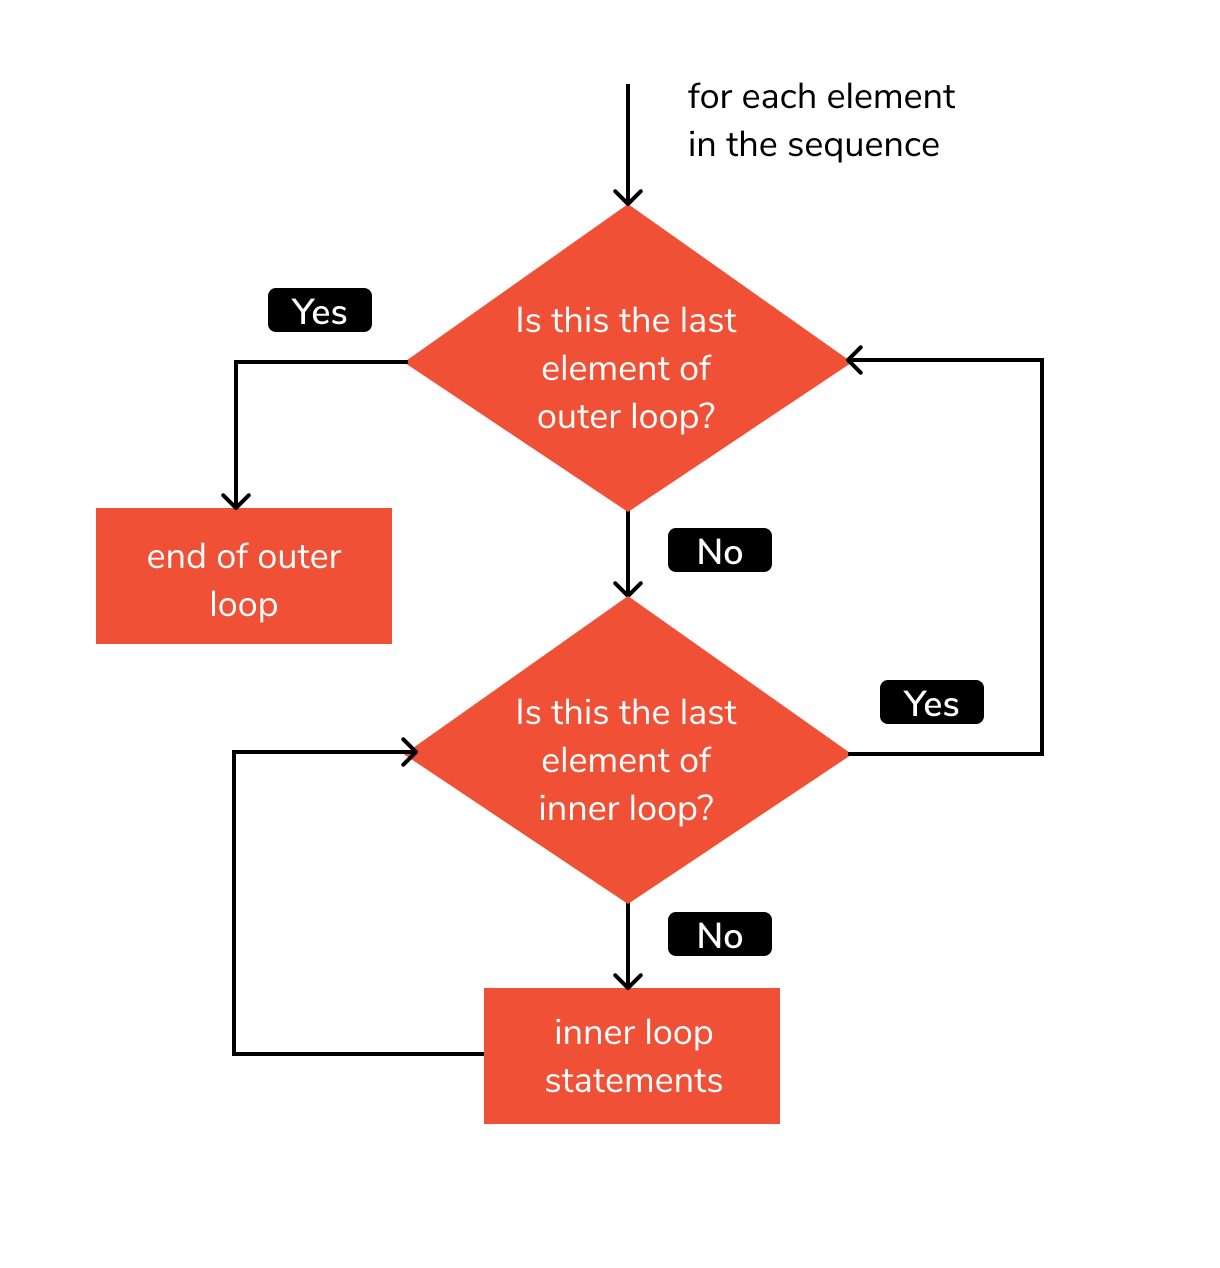

Here is a basic example

In [ ]:
list_a = ['a', 'b']
list_b = [1, 2, 3]

for a in list_a:
    for b in list_b:
        print(a + str(b))

For a more practical example, say we have a list, `multi_actors_list` where each element is another list. Each nested list is a list of actors, starring in the movies in `multi_movie_list`. First let's read in a bit more data and create our `multi_` lists. 

In [ ]:
# rename so we dont get confused 
taxidriver_actors = actors 

# read in new list with actors from the irishman 
with open('the_irishman_actors.txt') as f:    # open the text file into a new variable named `f`
    irishman_actors_init = f.readlines()    
irishman_actors = strip_newlines_actors(irishman_actors_init)

# read in new list with actors from the awakening
with open('awakenings_actors.txt') as f:    # open the text file into a new variable named `f`
    awakening_actors_init = f.readlines()  
awakening_actors = strip_newlines_actors(awakening_actors_init)

# combine all in one large list 
multi_actors_list = [taxidriver_actors, irishman_actors, awakening_actors]
multi_movie_list = ['Taxi Driver', 'The Irishman', 'Awakenings']

Now we want to create our nested for loop. The outer for loop will loop through each actors list in `multi_actors_list`, and enumerate the items. Using the `list_ind` index, we will find out the movie name from `multi_movie_list`. 

Then, the inner for loop will then loop through each actor in the list, and print a statement that tells us which movie they starred in. The counter from the outer loop tells us 

In [ ]:
for list_ind, list_val in enumerate(multi_actors_list):
    movie_name = multi_movie_list[list_ind]
    for actor in list_val:
        print(actor + ' starred in ' + movie_name)
        

## `iterrows` for looping & enumerating in pandas 

While we have been working with lists, it is likely you'll be using more complex data structures such as a Pandas dataframe.  We will create a few examples of this using a different file from Netflix, `titles.csv`. This is a large file so we will only read in the first 100 rows for this exercise. 

In [ ]:
import pandas as pd 
titles = pd.read_csv("titles_edit.csv", nrows=100)
titles.head()

Let's create a nested loop where we 1) use a for loop to pass through each row in our dataframe, 2) use a while loop to print something whenever the condition is true. 

Since we're working with a dataframe now, we can use `df.iterrows()` which acts exactly like enumerate, except instead of every element it returns & numbers each **row** in our dataframe. First let's demonstrate how `.iterrows()` works. Here we will loop through each row, and when the created index is 5, print the row's values. 

In [ ]:
for index, row in titles.iterrows():
    if index == 5:
        print(index, row)

And here is another example where we go through each row, and only print the title value in the row **if** the imdb score is greater than 8. 

In [ ]:
for index, row in titles.iterrows():
    if row.imdb_score > 8:
        print(index, row.title)

# Practice on your own 

For this practice we will use the `titles` dataframe, which we imported above. 

In [ ]:
titles.head()

#### Exercise 1. Isolate the values in the `production_countries` column, and save it to a new list called `country`. Use a for loop to pass through each item in the list and remove the square bracket and parentheses from the string (e.g. "['US']" becomes 'US'). Create a new list called `countries_fixed` with the results. 


In [ ]:
### BEGIN SOLUTION 

# isolate column 
country = titles.production_countries.values

# loop & fix 
countries_fixed = []
for c in country:
    c_new = c[2:-2]
    countries_fixed.append(c_new)

# check 
countries_fixed[0:10]

### END SOLUTION 

#### Exercise 2. Create a list named `movie_title` using: `movie_title = titles.title.values`. Then, use a for loop to pass through & add a counter to each element in the `countries_fixed` list. If the element contains `FR`, use the index to print the name of the movie. `movie_title` and `countries_fixed`  have the same indexing. 

In [ ]:
### BEGIN SOLUTION 

movie_title = titles.title.values

for ind, country in enumerate(countries_fixed):
    if country == 'FR':
        print(movie_title[ind])

### END SOLUTION 

#### Exercise 3. Zip together `movie_title` and `countries_fixed` into a single list of tuples. Print the first 10 tuples. 

In [ ]:
### BEGIN SOLUTION 

zipped = zip(movie_title, countries_fixed)
zipped_list = list(zipped)
zipped_list[0:10]

### END SOLUTION 

#### Exercise 4. Using list comprehension, create a list called `movie_type` that contains the values of the `type` column in lowercase letters. 

In [ ]:
### BEGIN SOLUTION 

movie_type = [t.lower() for t in titles.type.values]
movie_type[:10]
### END SOLUTION 

#### Exercise 5. Run the cell block below to create a new list called `genres_fixed`. This removes the square brackets & quotations like we did with `countries_fixed`, but this time there can be more than one genre. `genre_fixed` is a list of sub-lists, where some sub-lists have more than one element. 

#### We want to find out how many times the `fantasy` genre comes up as either a primary or secondary genre. Create a counter that will count how many times `fantasy` is found in each sub-list. Do this by using a nested for loop where the outer loop passes through each sub-list in `genres_fixed`, and the inner loop passes through each element in the sub-list. Every time the sub-list element is  `fantasy`, add 1 to a new empty list called `all_instances`. The sum of `all_instances` will be the total number of times `fantasy` was listed in `genres_fixed`. 

In [ ]:
genres = titles.genres.values

genres_fixed = []
for g in genres:
    comma_count = g.count(',')
    g_split = g.split("',")
    if comma_count == 0:
        g_new = [g_split[0][2:-2]]
    if comma_count == 1:
        g_new = [g_split[0][2:], g_split[1][2:-2]]
    genres_fixed.append(g_new)

In [ ]:
### BEGIN SOLUTION 

all_instances = []

for genre_list in genres_fixed: 
        for genre in genre_list: 
            if genre == 'fantasy':
                all_instances.append(1)
                
sum(all_instances)

### END SOLUTION 

#### Exercise 6. We want to create a list of movies that are not for kids. Loop through the rows in the `titles` dataframe, and print the titles of movies that are **not** rated `R` or `TV-MA`. 

In [ ]:
### BEGIN SOLUTION 

for index, row in titles.iterrows():
    if (row.age_certification != 'TV-MA') and (row.age_certification != 'R'):
        print(index, row.title)
        
### END SOLUTION 